<a href="https://colab.research.google.com/github/ADuthoit/yncrea_jee_2021_lab04/blob/master/ProjetNLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NLP Project 

### Nouvelle section Guillaume DE LACOSTE DE LAVAL - Alexandre DUTHOIT – Alexis ENGELAERE - Alexandre Ginesy

### Context :  
The project consist of a group of students who have to use the notorious Sentiment140 dataset to create and tune a Seq2Seq neural network that can predict if the tweet is positive or negative

In [5]:
!pip install matplotlib

In [4]:
#Import the libraries
import numpy as np
import tensorflow as tf
import re
import time
import pandas as pd
import matplotlib as plt
import seaborn as sns

In [ ]:
#Definition of some variable 
TRAIN_SIZE = 1280000
TEST_SIZE = 320000

**Part 1: Data Preprocessing**

**Step 1: Importing the dataset**


training.1600000.processed.noemoticon : the dataset contain 6 fiels:


*   target: the polarity of the tweet (0 = negative, 2 = neutral, 4 = positive)

* ids: The id of the tweet ( 2087)

* date: the date of the tweet (Sat May 16 23:58:44 UTC 2009)

* flag: The query (lyx). If there is no query, then this value is NO_QUERY.

* user: the user that tweeted (robotickilldozr)

* text: the text of the tweet (Lyx is cool)



 



In [7]:
from google.colab import files
uploaded = files.upload()

Saving training.1600000.processed.noemoticon.csv to training.1600000.processed.noemoticon.csv


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [8]:
dataset = pd.read_csv("training.1600000.processed.noemoticon.csv", encoding ="ISO-8859-1" , names=["target", "ids", "date", "flag", "user", "text"])

In [25]:
dataset

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,1,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,1,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,1,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,1,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In this dataset we have 3 target : 

*   0 -> negative
*   2 -> neutral
*   4 -> Positive

Or we want to have juste negative and positive so we will transform the encodage and delete all the neutral (but i don't find any neutral ?) :



*   0 : negative
*   1 : positive

I choose -1 and 1 to have a boolean at the end





In [16]:
dataset_processing = dataset
dataset_processing.replace(to_replace=4, value=1, inplace=True)

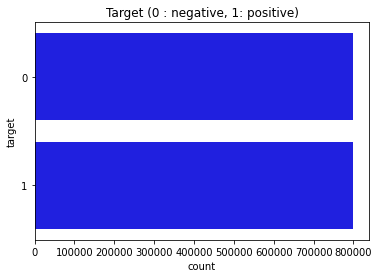

In [31]:
plt.pyplot.title('Target (0 : negative, 1: positive)')
sns.countplot(y='target', data=dataset_processing, color="b")


As we can see on this grpahic, the repartition of the tweets are 50% postive and 50% negative, It is good the AI we will build.

### Step 2: Clean the text

In [15]:
def clean_text(text):
  text = text.lower()
  text = re.sub(r"i'm", "i am", text)
  text = re.sub(r"he's", "he is", text)
  text = re.sub(r"she's", "she is", text)
  text = re.sub(r"that's", "that is", text)
  text = re.sub(r"what's", "what is", text)
  text = re.sub(r"don't", "do not", text)
  text = re.sub(r"where's", "where is", text)
  text = re.sub(r"\'ll", " will", text)
  text = re.sub(r"\'ve", " have", text)
  text = re.sub(r"\'re", " were", text)
  text = re.sub(r"\'d", " would", text)
  text = re.sub(r"can't", "can not", text)
  text = re.sub(r"won't", "will not", text)
  text = re.sub(r"[-()\"#/@;:<>{}+=~|.?]", "", text)
  return text

In [23]:
#Cleaning tthe text
clean_dataset_text=[]
for tweet in dataset.text:
 clean_dataset_text.append(clean_text(tweet))

In [ ]:
clean_dataset_text

###Step 3 : 
Find the  of occurences of each word by created a dictionnary that maps each word to its occurence Key --> Word Value --> # of occurence

In [38]:
word2count={}

for tweet in clean_dataset_text:
  for word in tweet.split():
    if word not in word2count:
      word2count[word] = 1
    else:
      word2count[word]+=1

In [ ]:
word2count

###Step 4 : 
Tokenization Create 2 dictionnaries to map question words and answer words to unique intergers key --> word Value --> unique interger

Filtering : set threshold : 20 occurences ( filtering important words)

In [40]:
#I know in this dataset the first 799 999 text is for the negative tweets and the 800 000 after is for the positive so i will take this information to build my dictionary of occurences

threshold = 20 
words2int={}
word_number=0

for word,count in word2count.items():
  if count>=threshold:
    words2int[word] = word_number
    word_number+=1


In [ ]:
words2int